## Imports

In [1]:
# To embed plots in the notebooks
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np # numpy library
import scipy . linalg as lng # linear algebra from scipy library
from scipy . spatial import distance # load distance function
from sklearn import preprocessing as preproc # load preprocessing function

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

## Load dataset

In [2]:
diabetPath = './DiabetesDataNormalized.txt'
T = np.loadtxt(diabetPath, delimiter = ' ', skiprows = 1)
y = T[:, 10]
X = T[:,:10]

# Get number of observations (n) and number of independent variables (p)
[n, p] = np.shape(X)

M = X

## 2 Examine Bias and Variance for the OLS:

> (a) Investigate the unbiasedness of OLS using simulated data as follows.

>> (i) Create a random matrix ${\bf X}$ consisting of three random variables which are NID, with $X ∼ N ({\bf 0}, {\bf I})$ and sample 10 observations from each.

>> (ii) Create the true regression parameters $β_{true} = [1, 2, 3]^T$.

>> (iii) Create the response y by the linear model ${\bf y} = {\bf X}β + {\bf ε}$. Make sure the errors ε are homoscedastic and zero-mean $ε ∼ N(0,σ^2)$, where $σ^2$ denotes the noise level in the simulated data.

>> (iv) Estimate the regression coefficients $β$ from this data

In [7]:
# Create a function that takes X and beta_true as parameters and returns an estimate of the betas by simulating observed variables
def estimate_betas(X, beta_true, sigma):
    """
    Parameters:
    X (nXp matrix): feature matrix used for simulation
    true_betas (array): array of ture betas

    Returns:
    true_betas: the estimated betas
   """
    # Simulate observed data using the created freature matrix
    # create 3 sim of X then sample 10 from each
    Xsim = np.random.normal(0, 1, (10, 3))

    ysim = np.dot(Xsim, beta_true) + np.random.normal(0, sigma, 10)

    # Estimate of betas
    beta = lng.lstsq(Xsim, ysim)[0]

    return beta

# define true betas, n and p, and sigma
beta_true = [1,2,3]
sigma = np.sqrt(0.1)
# Create a feature matrix either using np.random.normal or np.rand.randn

beta = estimate_betas(X, beta_true, sigma)
print (f'Estimated betas:{beta}')

Estimated betas:[1.3570134  2.27803699 2.88536532]


>> (v) Repeat steps (iii)-(iv) 100 times.

In [12]:
sigma = 0.1 # noise level
m = 100 # number of experiments
betas = np.zeros((3, m)) # all variable estimates
# call the method you just created 100 times and save the estimated betas
for i in range(m):
    betas[:, i] = estimate_betas(X, beta_true, sigma)

>> (vi) Use meaningful plots to investigate bias and variance for the model. Experiment with different noise levels $σ^2$. 

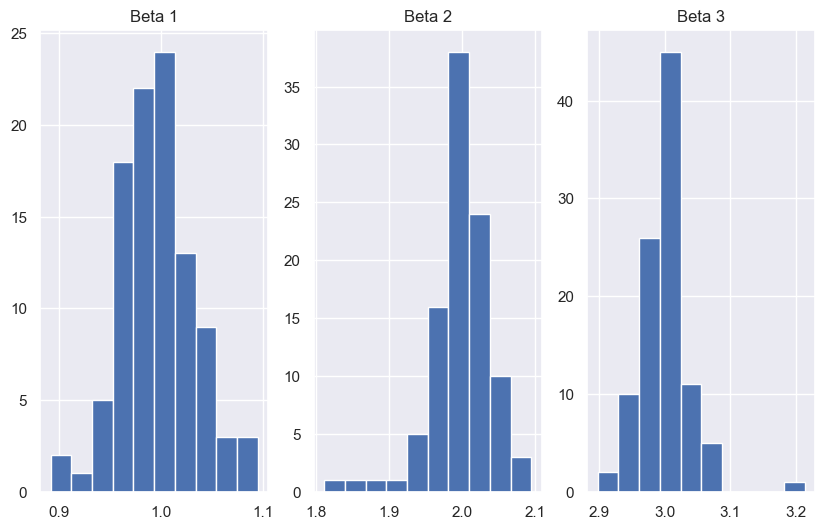

<Figure size 640x480 with 0 Axes>

In [14]:
# Investigate the betas that you have estimated from experiments with different noise levels
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.hist(betas[0, :])
plt.title('Beta 1')
plt.subplot(1, 3, 2)
plt.hist(betas[1, :])
plt.title('Beta 2')
plt.subplot(1, 3, 3)
plt.hist(betas[2, :])
plt.title('Beta 3')
plt.show()
plt.tight_layout()

What does bias and variance mean?

Are the parameter estimates unbiased? 

What happens when you change the noise level?